In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
data = pd.read_csv('./Admission_Predict.csv')

In [31]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [37]:
data.drop('Serial No.', axis=1, inplace=True)

In [35]:
a.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [9]:
model = LogisticRegression()

In [10]:
y = data['Chance of Admit ']
x = data.drop('Chance of Admit ', axis=1)

In [17]:
x_train, x_test,y_train, y_test = train_test_split(x, y,test_size = 0.40,random_state = 101)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])



y_train_01 = [1 if each > 0.7 else 0 for each in y_train]
y_test_01  = [1 if each > 0.7 else 0 for each in y_test]

# list to array to fit into sklearn models
y_train_01 = np.array(y_train_01)
y_test_01 = np.array(y_test_01)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [23]:
y_train

206    0.63
318    0.79
202    0.97
314    0.66
20     0.64
119    0.71
179    0.73
305    0.74
209    0.68
162    0.67
341    0.79
135    0.82
292    0.56
83     0.92
269    0.77
188    0.93
272    0.49
251    0.70
216    0.91
299    0.71
335    0.83
361    0.93
73     0.84
55     0.64
323    0.62
85     0.76
242    0.70
159    0.52
177    0.82
369    0.67
       ... 
76     0.74
126    0.85
275    0.78
249    0.77
328    0.80
44     0.91
59     0.42
378    0.56
371    0.89
136    0.76
111    0.69
339    0.81
49     0.78
392    0.84
5      0.90
110    0.61
192    0.86
220    0.76
316    0.54
245    0.81
395    0.82
132    0.71
40     0.46
75     0.72
87     0.66
63     0.56
326    0.63
337    0.94
11     0.84
351    0.73
Name: Chance of Admit , Length: 240, dtype: float64

In [21]:
y_train_01

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [26]:
model = LogisticRegression()
model.fit(x_train,y_train_01)

print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(model.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(model.predict(x_test.iloc[[2],:])))


real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 1 -> the predict: [0]
real value of y_test_01[3]: 1 -> the predict: [0]
real value of y_test_01[4]: 1 -> the predict: [0]
real value of y_test_01[5]: 1 -> the predict: [1]
real value of y_test_01[6]: 1 -> the predict: [1]


In [27]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_lrc = confusion_matrix(y_test_01,model.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29


from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,model.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,model.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,model.predict(x_test)))

from sklearn.metrics import classification_report
print(classification_report(y_test_01,model.predict(x_test)))

precision_score:  0.8505747126436781
recall_score:  0.8314606741573034
f1_score:  0.8409090909090909
             precision    recall  f1-score   support

          0       0.79      0.82      0.81        71
          1       0.85      0.83      0.84        89

avg / total       0.83      0.82      0.83       160



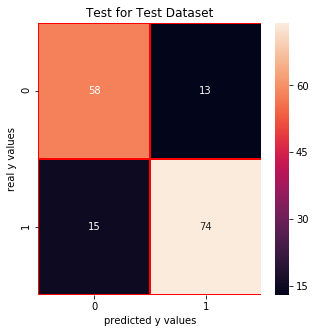

In [28]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()